<a href="https://colab.research.google.com/github/toutbien/PurduePython/blob/main/MLWeek3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Task 3***

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

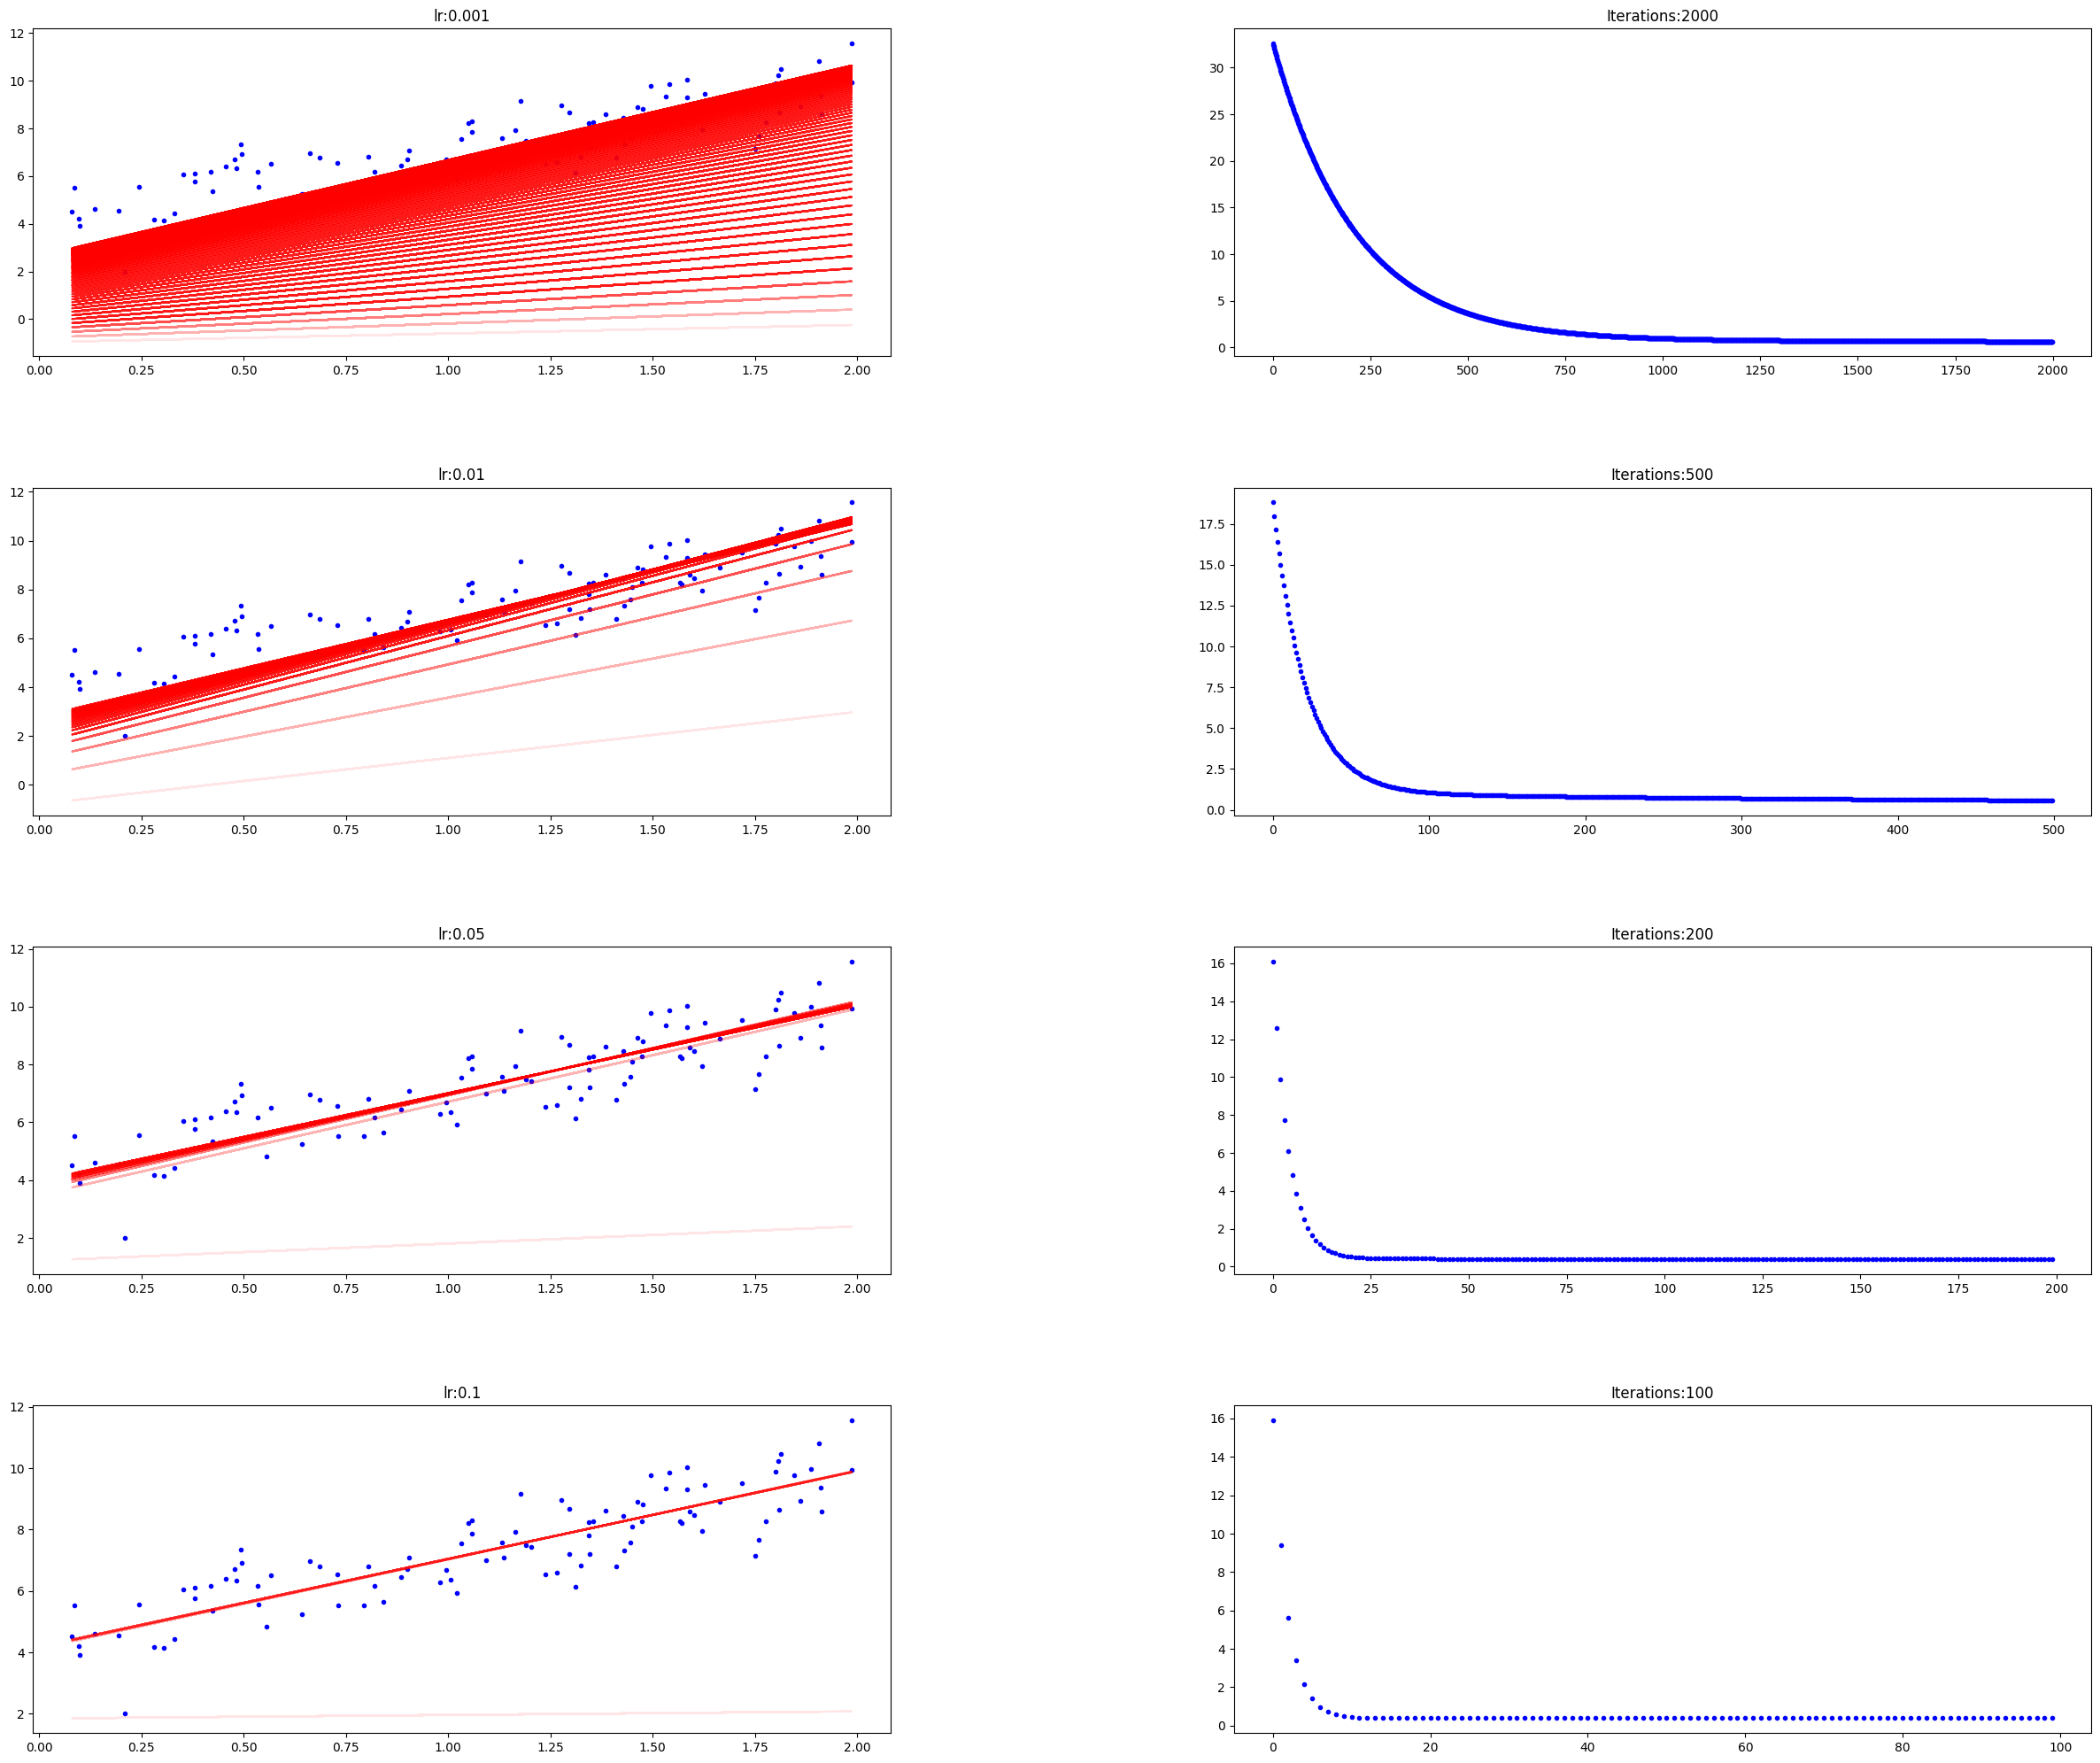

In [38]:
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate=0.01, iterations=200):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = X.dot(theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot(prediction - y))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, X, y)

    return theta, cost_history, theta_history

def plot_GD(n_iter, lr, ax, ax1=None):
    ax.plot(X, y, 'b.')
    theta = np.random.randn(2, 1)
    tr = 0.1
    cost_history = np.zeros(n_iter)

    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta, h, _ = gradient_descent(X_b, y, theta, lr, 1)
        pred = X_b.dot(theta)
        cost_history[i] = h[0]

        if (i % 25 == 0):
            ax.plot(X, pred, 'r-', alpha=tr)
            if tr < 0.8:
                tr = tr + 0.2

    if ax1 is not None:
        ax1.plot(range(n_iter), cost_history, 'b.')

# Generate the data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((len(X), 1)), X]  # Add x0 = 1 to each instance

# Set learning rates and number of iterations
learning_rates = [0.001, 0.01, 0.05, 0.1]
n_iter = 200

fig = plt.figure(figsize=(30, 25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
it_lr = [(2000, 0.001), (500, 0.01), (200, 0.05), (100, 0.1)]
count = 0

for n_iter, lr in it_lr:
    count += 1
    ax = fig.add_subplot(4, 2, count)
    count += 1
    ax1 = fig.add_subplot(4, 2, count)
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter, lr, ax, ax1)

plt.show()
